# Ana Lucia Pelayo Macias
Avance 3 Evidencia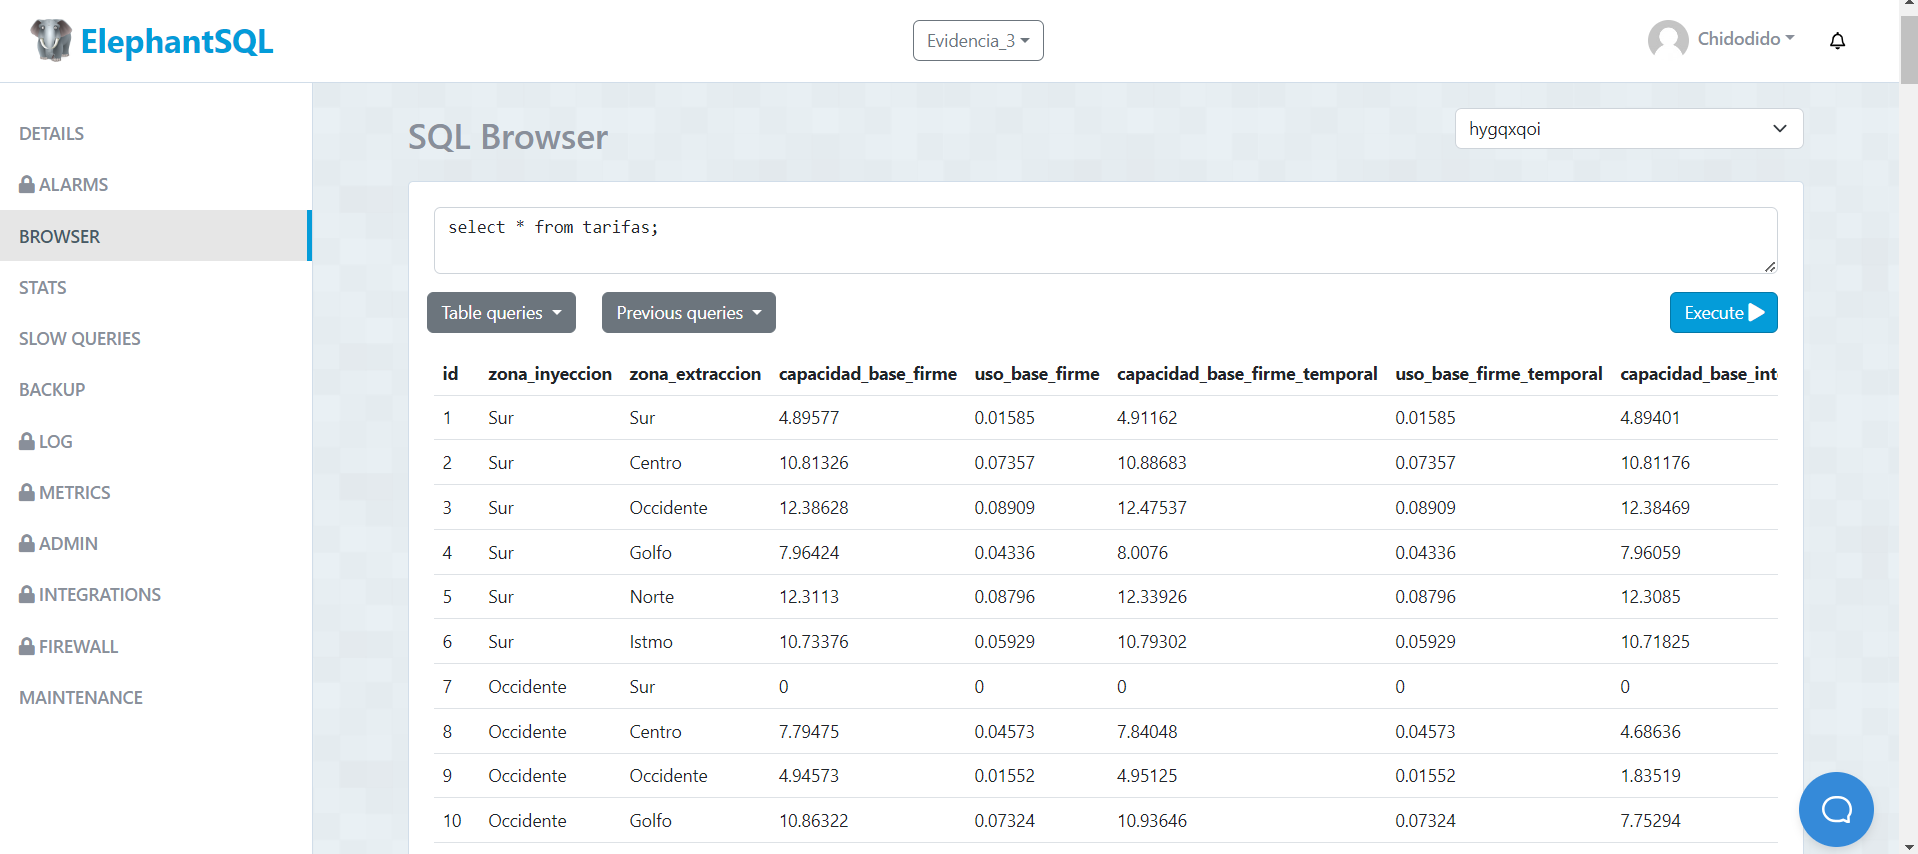

Instrucciones:

Crea al menos una tabla utilizando la sentencia CREATE TABLE.
Descarga el dataset original y llena la(s) tabla(s) nueva(s) en la base de datos con esa información.
1. Prepara una propuesta para la visualización de la información que llevará la investigación, por lo que lleva a cabo lo siguiente:
2. Investiga sobre cómo llevar a cabo el proceso de importación de la librería Matplotlib a Python.
3. Averigua como generar diversos gráficos con esta librería.
Justifica la importancia de la visualización de los datos.
Presenta una propuesta de visualización mediante gráficos de línea y de barras.


In [47]:
#importar librerias
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import psycopg2


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
ruta_archivo_inegi  = '/content/drive/MyDrive/Tarifas por puntos 2016-2017.csv'

In [49]:
#conectar con elephant sql
conn = psycopg2.connect(
    dbname='hygqxqoi',
    user='hygqxqoi',
    password='2he8gffQQ-x9qIt2tPTtdEKX0phtHCkY',
    host='motty.db.elephantsql.com',
    port='5432'
)

In [50]:
#crear un cursor
cursor = conn.cursor()

#no continuar si existe la tabla Tarifas
cursor.execute("DROP TABLE IF EXISTS tarifas")
conn.commit()

In [51]:
#crear la tabla tarifas
cursor.execute("""
CREATE TABLE IF NOT EXISTS tarifas(
    id SERIAL PRIMARY KEY,
    zona_inyeccion VARCHAR(15) NOT NULL,
    zona_extraccion VARCHAR(15) NOT NULL,
    capacidad_base_firme FLOAT,
    uso_base_firme FLOAT,
    capacidad_base_firme_temporal FLOAT,
    uso_base_firme_temporal FLOAT,
    capacidad_base_interrumpible FLOAT,
    uso_base_interrumpible FLOAT,
    volumetrica FLOAT,
    fecha_inicio VARCHAR(15)NOT NULL,
    fecha_fin VARCHAR(15) NOT NULL);
 """)

conn.commit()

In [52]:
#crear el dataframe
df = pd.read_csv(ruta_archivo_inegi)
#exploracion de datos
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   zona_inyeccion                 216 non-null    object 
 1   zona_extraccion                216 non-null    object 
 2   capacidad_base_firme           216 non-null    float64
 3   uso_base_firme                 216 non-null    float64
 4   capacidad_base_firme_temporal  216 non-null    float64
 5   uso_base_firme_temporal        216 non-null    float64
 6   capacidad_base_interrumpible   216 non-null    float64
 7   uso_base_interrumpible         216 non-null    float64
 8   volumetrica                    216 non-null    float64
 9   fecha_inicio                   216 non-null    object 
 10  fecha_fin                      216 non-null    object 
dtypes: float64(7), object(4)
memory usage: 18.7+ KB


,zona_inyeccion,zona_extraccion,capacidad_base_firme,uso_base_firme,capacidad_base_firme_temporal,uso_base_firme_temporal,capacidad_base_interrumpible,uso_base_interrumpible,volumetrica,fecha_inicio,fecha_fin
0,Sur,Sur,4.89577,0.01585,4.91162,0.01585,4.89401,0.01585,5.03491,01/01/2016,31/03/2016
1,Sur,Centro,10.81326,0.07357,10.88683,0.07357,10.81176,0.07357,11.42890,01/01/2016,31/03/2016
2,Sur,Occidente,12.38628,0.08909,12.47537,0.08909,12.38469,0.08909,13.12899,01/01/2016,31/03/2016
3,Sur,Golfo,7.96424,0.04336,8.00760,0.04336,7.96059,0.04336,8.34380,01/01/2016,31/03/2016
4,Sur,Norte,12.31130,0.08796,12.33926,0.08796,12.30850,0.08796,13.04508,01/01/2016,31/03/2016


In [53]:
#llenar base de datos SQL de elephantSQL
for _ , row in df.iterrows():
  cursor.execute("INSERT INTO tarifas(zona_inyeccion, zona_extraccion, capacidad_base_firme, uso_base_firme, capacidad_base_firme_temporal, uso_base_firme_temporal, capacidad_base_interrumpible, uso_base_interrumpible, volumetrica, fecha_inicio, fecha_fin) VALUES (%s, %s, %s, %s,%s, %s, %s, %s, %s, %s, %s);", (row ['zona_inyeccion'],row ['zona_extraccion'],row['capacidad_base_firme'], row['uso_base_firme'], row['capacidad_base_firme_temporal'],row['uso_base_firme_temporal'], row['capacidad_base_interrumpible'], row['uso_base_interrumpible'], row['volumetrica'], row['fecha_inicio'], row['fecha_fin']))
  conn.commit()

<function matplotlib.pyplot.show(close=None, block=None)>

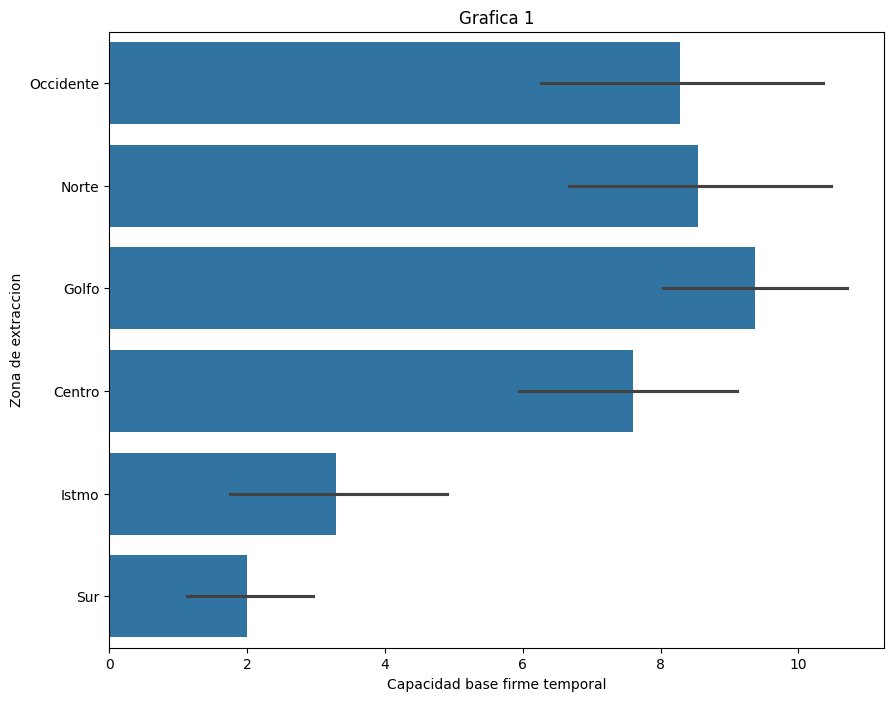

In [54]:
#Visualizaciones de los datos
#1
#importar matplotlib y seaborn
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8)) #define el tamaño de la figura para la visualizacion
df.sort_values('capacidad_base_firme_temporal', ascending=False, inplace=True) #ordena el data frame por la columna poblacion total
sns.barplot(x='capacidad_base_firme_temporal', y='zona_extraccion', data=df) #crea un grafico

plt.title('Grafica 1')
plt.xlabel('Capacidad base firme temporal')
plt.ylabel('Zona de extraccion')
plt.show

En el grafico anterior nos permite responder gráficamente a la pregunta:

 ¿Cuál es la capacidad de la base firme temporal por zona de extracción?

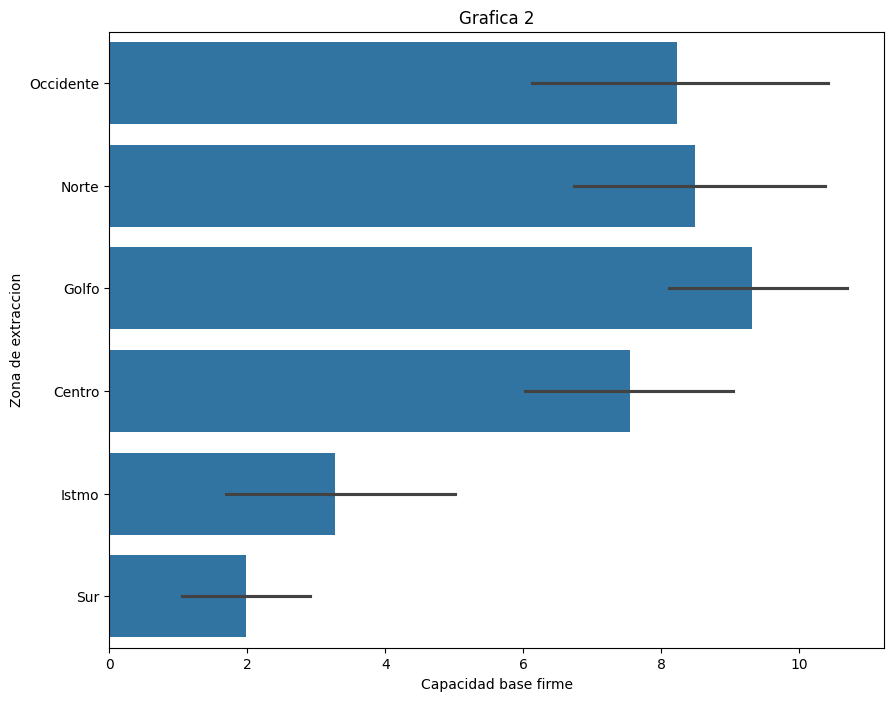

In [55]:
plt.figure(figsize=(10, 8)) #define el tamaño de la figura para la visualizacion
df.sort_values('capacidad_base_firme', ascending=False, inplace=True) #ordena el data frame por la comumna poblacion total
sns.barplot(x='capacidad_base_firme', y='zona_extraccion', data=df) #crea un grafico

plt.title('Grafica 2')
plt.xlabel('Capacidad base firme')
plt.ylabel('Zona de extraccion')
plt.show()

En el grafico anterior nos permite responder gráficamente a la pregunta:

¿Cuál es la capacidad de la base firme por zona de extracción?

* Es muy similar a la gráfica 1 pero en este caso tenemos la comparativa de las bases firmes y no las temporales.

<Figure size 1000x600 with 0 Axes>

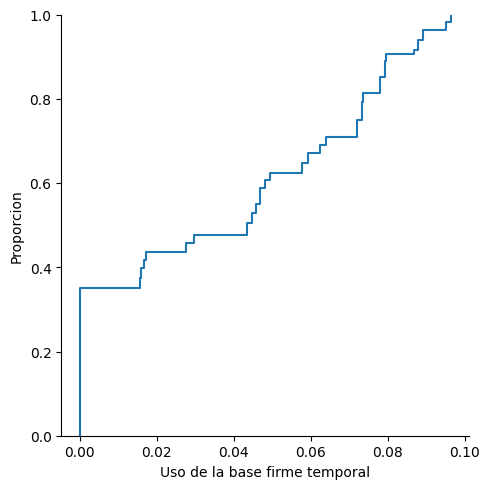

In [56]:
uso_mes = df.groupby('fecha_inicio').size()
plt.figure(figsize=(10,6))
sns.displot(data=df, x="uso_base_firme_temporal", kind="ecdf")

plt.xlabel('Uso de la base firme temporal')
plt.ylabel('Proporcion')
plt.show()

En este grafico alcanzamos a observar de forma gráfica una función de distribución empírica, que es la función de distribución asociada con una medida empírica de una muestra. En este caso en particular observamos la función del uso de la base firme temporal

<Figure size 1000x600 with 0 Axes>

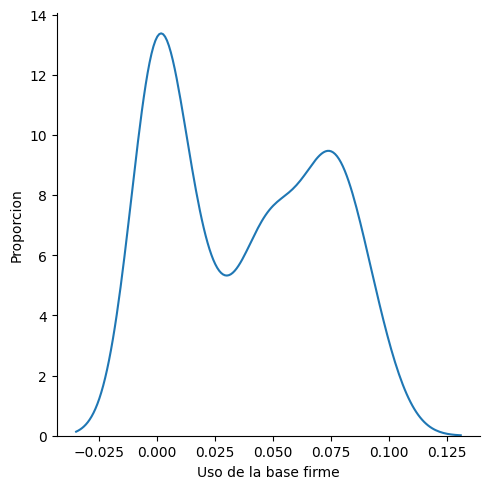

In [57]:
plt.figure(figsize=(10,6))
sns.displot(data=df, x="uso_base_firme", kind="kde")

plt.xlabel('Uso de la base firme')
plt.ylabel('Proporcion')
plt.show()

En éste último gráfico tenemos un KDE que es un gráfico que indica la distribución de los datos. En éste KDE observamos la distribución del dato 'Uso de la base firme'.

In [58]:
'''
A continuacion tenemos una serie de funciones que nos permiten obtener los siguientes datos:
 * Método de validación para los datos en CVS
 * El promedio del costo a la tarifa de gas correspondiente a los años 2016 y 2017.
 * La variación del precio del gas natural a lo largo de dos años.
 * La demanda promedio del gas natural para 2016.
 * La demanda promedio del gas natural para 2017.
 * Las tarifas máximas para cada uno de los dos

'''
def promedio_costo_gas(df):
  #promedio del costo a la tarifa de gas
  datos = df['volumetrica'].head(122) #obtenemos del dataframe  la variable 'volumetrica y analizamos los 122 datos que corresponden al 2016'
  promedio2016 = datos.mean() #obtenemos el promedio
  print(promedio2016, "en 2016") #al ejecutar la funcion devuelve la tarifa promedio en 2016 en texto

  datos = df['volumetrica'].tail(96) #obtenemos del dataframe  la variable 'volumetrica y analizamos los ultimos 96 datos que corresponden al 2017'
  promedio2017 = datos.mean()
  print(promedio2017, "en 2017") #al ejecutar la funcion devuelve la tarifa promedio en 2017 en texto

def variacion_precio_gas(df):
  # La variación del precio del gas natural a lo largo de dos años.

  precio_inicial = df.iloc[0]["volumetrica"] #obtener el dato mas pequeño y el mas grande
  precio_final = df.iloc[-1]["volumetrica"]
  variacion = precio_final - precio_inicial #calculo de la variacion

  print(variacion) #esta funcion regresa el valor de la variacion.

def demanda_promedio_2016(df):
  #La demanda promedio del gas natural para 2016.

  datos_demanda = df['uso_base_firme'].head(121) #de acuerdo a los datos del 2016 tomamos el 'uso de la base firme'
  promedio_demanda = datos_demanda.mean() #calculamos el promedio.
  print(promedio_demanda) #regresa el valor del promedio de la demanda

def demanda_promedio_2017(df):
  #La demanda promedio del gas natural para 2017.

  datos_demanda = df['uso_base_firme'].tail(96) #de acuerdo a los datos del 2017 tomamos el 'uso de la base firme'
  promedio_demanda = datos_demanda.mean() #calculamos el promedio
  print(promedio_demanda) #regresa el valor del promedio de la demanda

def max_2016(df):
  #Las tarifas máximas para 2016
  datos_max_2016 = df['volumetrica'].head(122) #tomamos el dato 'volumetrica' de 2016
  maxima = datos_max_2016.max() #buscamos el valor mas alto
  print(maxima, "fue la maxima en 2016") #regresa el valor de la tarifa maxima para 2016

def max_2017(df):
  datos_max_2017 = df['volumetrica'].tail(96) #tomamos el dato 'volumetrica' de 2017
  maxima = datos_max_2017.max() #buscamos el valor mas alto
  print(maxima, "fue la maxima en 2017") #regresa el valor de la tarifa maxima para 2017

In [64]:
#llamamos todas las funciones
print("La variacion es:")
variacion_precio_gas(df)
print("El promedio de 2016 y 2017 respectivamente es de:")
promedio_costo_gas(df)
print("La demanda promedio de 2016 es de:")
demanda_promedio_2016(df);
print("La demanda promedio de 2017 es de:")
demanda_promedio_2017(df);
print("La tarifa maxima de 2016 es de:")
max_2016(df)
print("La tarifa maxima de 2017 es de:")
max_2017(df)


La variacion es:
-20.35563
El promedio de 2016 y 2017 respectivamente es de:
11.846601885245905 en 2016
0.8779966666666666 en 2017
La demanda promedio de 2016 es de:
0.06484694214876034
La demanda promedio de 2017 es de:
0.0037781250000000002
La tarifa maxima de 2016 es de:
20.35563 fue la maxima en 2016
La tarifa maxima de 2017 es de:
6.29464 fue la maxima en 2017


Finalmente en las instrucciones pide entregar este archivo y el .sql generado
en mi caso particular al utilizar ElephantSQL, me exporta un archivo .lzo que es un archivo comprimido y solo para dejar registro de la evidencia de la base de datos que cree anexo imagen de la base de datos creada.

https://drive.google.com/file/d/1ws_JEMsT9HLsyY32X4vxf1ow4i54cuDI/view?usp=sharing
